In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

In [2]:
spam = pd.read_csv('spam.csv') # data set read

In [3]:
spam

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
spam.shape

(5572, 2)

In [5]:
spam.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [6]:
spam.groupby(spam['Category']).size()

Category
ham     4825
spam     747
dtype: int64

In [7]:
spam.Category = spam.Category.apply(lambda x: 1 if x == 'spam' else 0)

In [8]:
spam.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
messages = spam.iloc[:,1] # Messages column

In [10]:
messages.head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: Message, dtype: object

In [11]:
ifSpam = spam.iloc[:,0] # Spam column

In [12]:
ifSpam.head()

0    0
1    0
2    1
3    0
4    0
Name: Category, dtype: int64

In [13]:
messages_train, messages_test, ifSpam_train, ifSpam_test = train_test_split(messages, ifSpam, test_size=0.25)

In [14]:
cv = CountVectorizer()

In [15]:
features = cv.fit_transform(messages_train)

In [16]:
features_test = cv.transform(messages_test)

In [17]:
knModel = KNeighborsClassifier(n_neighbors=1)

In [18]:
knModel.fit(features, ifSpam_train)

,n_neighbors,1
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [19]:
knPredict = knModel.predict(features_test)

In [20]:
dtModel = tree.DecisionTreeClassifier()

In [21]:
dtModel.fit(features, ifSpam_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [22]:
dtPredict = dtModel.predict(features_test)

In [23]:
svModel = svm.SVC()

In [24]:
svModel.fit(features,ifSpam_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [25]:
svPredict = svModel.predict(features_test)

In [26]:
rfModel = RandomForestClassifier()

In [27]:
rfModel.fit(features, ifSpam_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [28]:
rfPredict = rfModel.predict(features_test)

In [29]:
from sklearn.metrics import ConfusionMatrixDisplay, PrecisionRecallDisplay, RocCurveDisplay

def visualization(model):
    predict = model.predict(features_test)
    ConfusionMatrixDisplay.from_estimator(model, features_test, ifSpam_test)
    PrecisionRecallDisplay.from_estimator(model, features_test, ifSpam_test)
    RocCurveDisplay.from_estimator(model, features_test, ifSpam_test)

In [30]:
print("Number of mislabeled out of a total of %d test entries: %d" % (features_test.shape[0], 
                                                                      (ifSpam_test != knPredict).sum()))

Number of mislabeled out of a total of 1393 test entries: 70


In [31]:
successRate = 100.0 * f1_score(ifSpam_test, knPredict, average='micro')

In [32]:
print("The Success Rate was calculated as % : " + str(successRate) + " with the K-Nearest-Neighbors")

The Success Rate was calculated as % : 94.9748743718593 with the K-Nearest-Neighbors


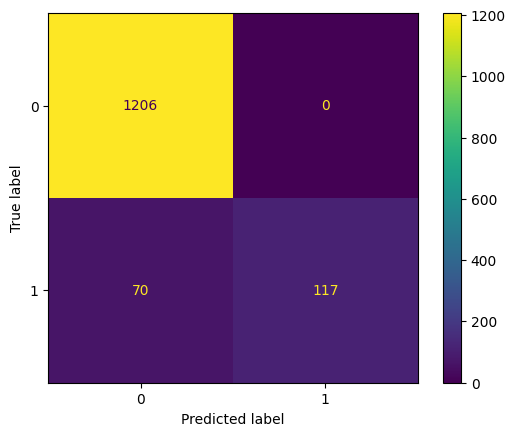

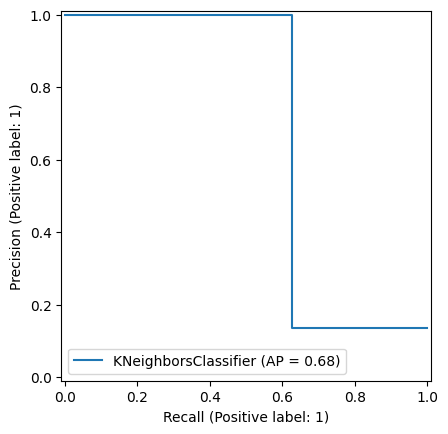

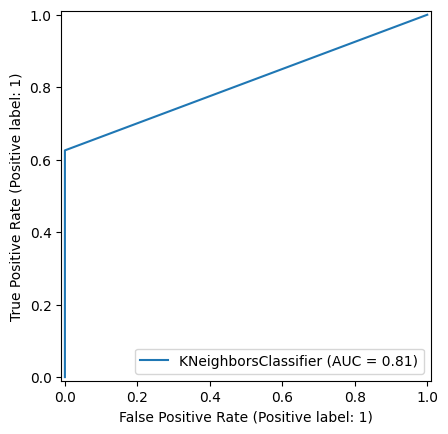

In [33]:
visualization(knModel)

In [34]:
print("Number of mislabeled out of a total of %d test entries: %d" % (features_test.shape[0], 
                                                                      (ifSpam_test != rfPredict).sum()))

Number of mislabeled out of a total of 1393 test entries: 37


In [35]:
successRate = 100.0 * f1_score(ifSpam_test, rfPredict, average='micro')

In [36]:
print("The Success Rate was calculated as % : " + str(successRate) + " with Random Forest")

The Success Rate was calculated as % : 97.34386216798278 with Random Forest


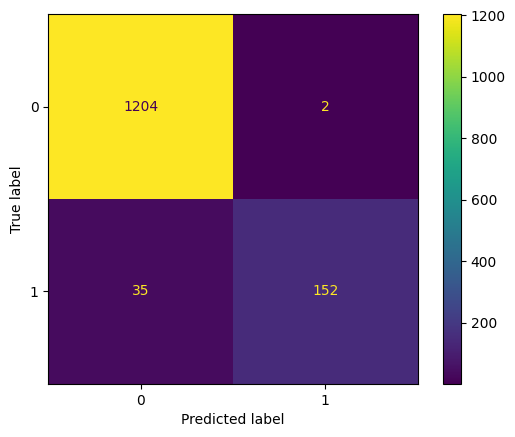

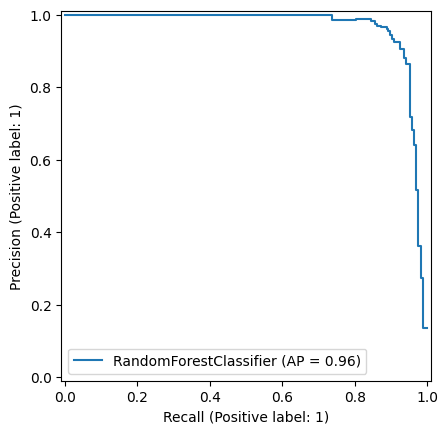

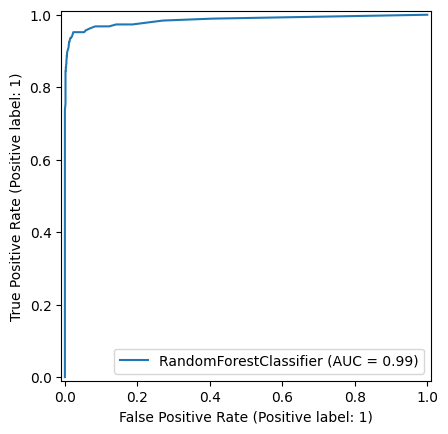

In [37]:
visualization(rfModel)

In [38]:
print("Number of mislabeled out of a total of %d test entries: %d" % (features_test.shape[0], 
                                                                      (ifSpam_test != dtPredict).sum()))

Number of mislabeled out of a total of 1393 test entries: 49


In [39]:
successRate = 100.0 * f1_score(ifSpam_test, dtPredict, average='micro')

In [40]:
print("The Success Rate was calculated as % : " + str(successRate) + " with Decision Tree")

The Success Rate was calculated as % : 96.4824120603015 with Decision Tree


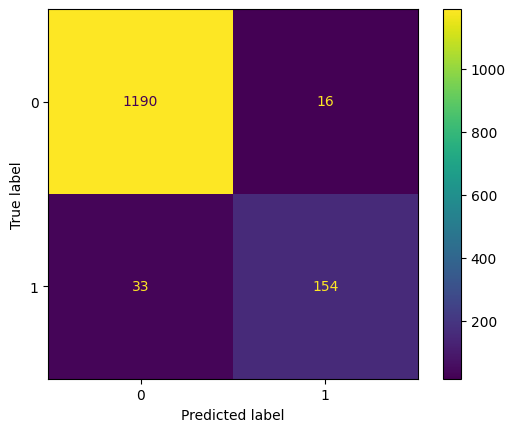

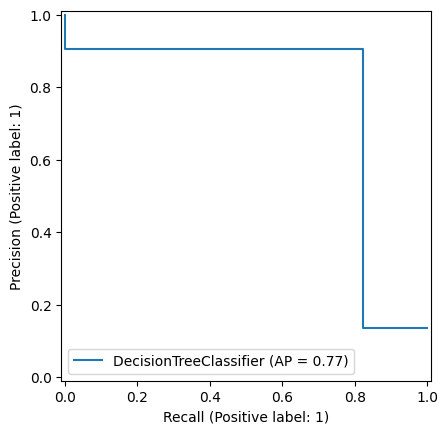

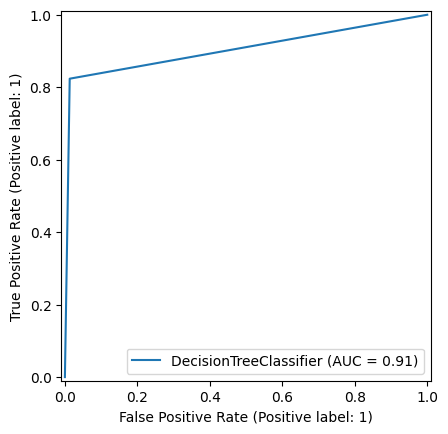

In [41]:
visualization(dtModel)

In [42]:
print("Number of mislabeled out of a total of %d test entries: %d" % (features_test.shape[0], 
                                                                      (ifSpam_test != svPredict).sum()))

Number of mislabeled out of a total of 1393 test entries: 30


In [43]:
successRate = 100.0 * f1_score(ifSpam_test, svPredict, average='micro')

In [44]:
print("The Success Rate was calculated as % : " + str(successRate) + " with Support Vector Machine")

The Success Rate was calculated as % : 97.84637473079684 with Support Vector Machine


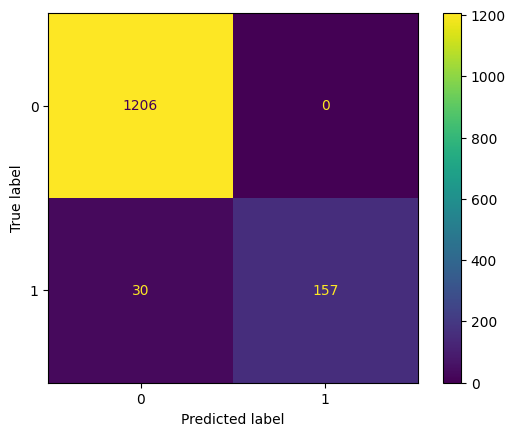

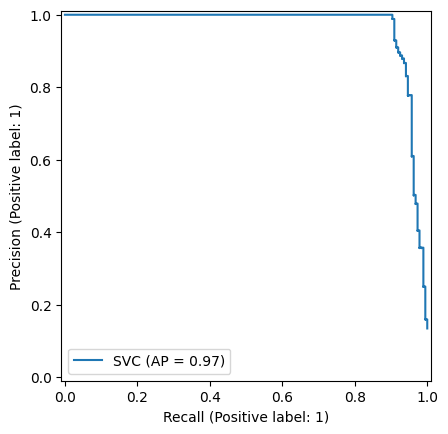

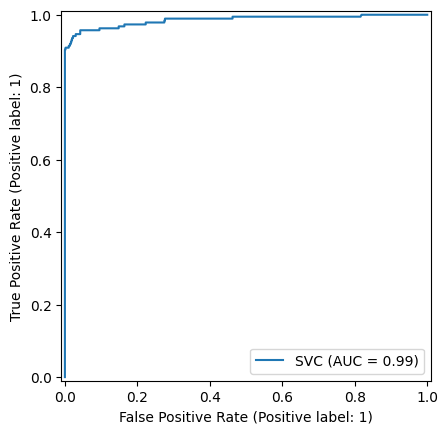

In [45]:
visualization(svModel)

In [47]:
# The trained SVM model from the notebook is named 'svModel'
# The trained CountVectorizer is named 'cv'

# Prompt the user for input
user_input = input("Please enter a message to classify: ")

# Use the trained CountVectorizer to transform the user's input
# This step is crucial to ensure the new input is in the same format the model was trained on
new_features = cv.transform([user_input])

# Use the trained SVM model (svModel) to predict the category of the new message
new_prediction = svModel.predict(new_features)

# Map the numerical prediction (0 or 1) back to 'spam' and 'ham' labels
label_mapping = {1: 'spam', 0: 'ham'}
predicted_label = label_mapping[new_prediction[0]]

# Display the output
print(f"\nMessage: {user_input}")
print(f"Predicted category: {predicted_label}")

Please enter a message to classify:  Congratulations! You've won a free holiday trip. Click here to claim your prize.



Message: Congratulations! You've won a free holiday trip. Click here to claim your prize.
Predicted category: spam
